In [ ]:
!unzip generated_images.zip -d generated_images
!unzip textures.zip -d textures

Archive:  generated_images.zip
   creating: generated_images/generated_images/
 extracting: generated_images/generated_images/image_00006.png  
 extracting: generated_images/generated_images/image_00632.png  
 extracting: generated_images/generated_images/image_00834.png  
 extracting: generated_images/generated_images/image_00303.png  
 extracting: generated_images/generated_images/image_00283.png  
  inflating: generated_images/generated_images/image_00475.png  
 extracting: generated_images/generated_images/image_00079.png  
 extracting: generated_images/generated_images/image_00612.png  
 extracting: generated_images/generated_images/image_00371.png  
 extracting: generated_images/generated_images/image_00285.png  
  inflating: generated_images/generated_images/image_00960.png  
 extracting: generated_images/generated_images/image_00542.png  
 extracting: generated_images/generated_images/image_00477.png  
  inflating: generated_images/generated_images/image_00530.png  
 extracting

In [ ]:
from PIL import Image, ImageOps
import random
from PIL import Image
from math import sin, cos, radians

texture_path = 'textures/content/textures/'
img_path = 'generated_images/generated_images/'

In [ ]:
from PIL import Image, ImageOps

import numpy as np
from PIL import Image, ImageOps

import numpy as np
from PIL import Image, ImageOps

import numpy as np
from PIL import Image, ImageOps

def apply_mask(texture_img, mask_img, add_noise=False):
    resized_texture = texture_img.resize((64, 64), Image.ANTIALIAS)
    mask_img = mask_img.convert('L')
    masked_image = ImageOps.fit(resized_texture, mask_img.size, method=Image.ANTIALIAS, centering=(0.5, 0.5))
    masked_image.putalpha(mask_img)

    if add_noise:
        image_data = np.array(masked_image)
        image_data = image_data[:64, :64, :] # Make sure the image size is 64x64
        
        noise_types = ['gaussian', 'salt_pepper', 'poisson', 'none', 'none2', 'none3']
        noise_type = random.choice(noise_types)
        
        if noise_type == 'gaussian':
            noise = np.random.normal(0, 25, (image_data.shape[0], image_data.shape[1], 3))
        elif noise_type == 'salt_pepper':
            prob = 0.05
            s_vs_p = 0.5
            num_salt = np.ceil(prob * image_data[..., :3].size * s_vs_p)
            coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image_data[..., :3].shape]
            image_data[..., :3][tuple(coords)] = 255
            num_pepper = np.ceil(prob * image_data[..., :3].size * (1 - s_vs_p))
            coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image_data[..., :3].shape]
            image_data[..., :3][tuple(coords)] = 0
        elif noise_type == 'poisson':
            vals = len(np.unique(image_data[..., :3]))
            vals = 2 ** np.ceil(np.log2(vals))
            noise = np.random.poisson(image_data[..., :3] * vals) / float(vals) - image_data[..., :3]
        
        if noise_type != 'salt_pepper' and noise_type != 'none' and noise_type != 'none1' and noise_type != 'none2' and noise_type != 'none3':
            noisy_image_data = image_data[..., :3] + noise/10.0
            image_data[..., :3] = np.clip(noisy_image_data, 0, 255).astype(np.uint8)
        
        masked_image = Image.fromarray(image_data)

    return masked_image



In [ ]:
# def apply_mask(texture_img, mask_img):
#     resized_texture = texture_img.resize((64, 64), Image.ANTIALIAS)
#     mask_img = mask_img.convert('L')
#     masked_image = ImageOps.fit(resized_texture, mask_img.size, method=Image.ANTIALIAS, centering=(0.5, 0.5))
#     masked_image.putalpha(mask_img)

#     return masked_image 

In [ ]:
def random_int_exclude(start, stop, exclude_list):
    candidates = [i for i in range(start, stop + 1) if i not in exclude_list]
    random_number = random.choice(candidates)
    return random_number

In [ ]:
# def random_rotate_and_scale(image):
#     angle = random.uniform(0, 360)
#     width, height = image.size
#     new_width = int(abs(width * abs(cos(radians(angle))) + height * abs(sin(radians(angle)))))
#     new_height = int(abs(height * abs(cos(radians(angle))) + width * abs(sin(radians(angle)))))
#     rotated_image = image.rotate(angle, resample=Image.BICUBIC, expand=True)
#     scaled_image = rotated_image.resize((width, height), Image.ANTIALIAS)

#     return scaled_image

In [ ]:
def paste_small_image_on_large(small_img, large_img, small_img_mask, large_img_mask, itr, flg):
    # Generate a random point on the 512x512 image
    max_x = large_img.width - small_img.width
    max_y = large_img.height - small_img.height

    x = random.randint(0, max_x)
    y = random.randint(0, max_y)
    

    width, height = small_img_mask.size
    modified_img = Image.new("RGBA", (width, height), (0, 0, 0, 255))

    for row_itr in range(width):
        for col_itr in range(height):
            # Get the color of the pixel at (x, y)
            color = tuple([pix//(itr+1) for pix in small_img_mask.getpixel((row_itr, col_itr))])
            small_img_mask.putpixel((row_itr, col_itr), color)

    # Paste the small image onto the large image
    large_img.paste(small_img, (x, y), small_img)
    if flg:
      large_img_mask.paste(small_img_mask, (x, y), small_img_mask)
    return

In [ ]:
import random
import cv2
import numpy as np
from PIL import Image

def random_mask_transform(mask):
    # Randomly rotate the mask
    angle = random.uniform(0, 15)
    rotated_mask = mask.rotate(angle, resample=Image.BICUBIC, expand=False)

    # Randomly erode or dilate the mask
    kernel_size = random.choice([2])
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    erode_or_dilate = random.choice(["no_act", "erode", "dilate", "no_act1", "no_act2"])
    mask_cv2 = np.array(rotated_mask)
    if erode_or_dilate == "erode":
        mask_cv2 = cv2.erode(mask_cv2, kernel, iterations=1)
    elif erode_or_dilate == "dilate":
        mask_cv2 = cv2.dilate(mask_cv2, kernel, iterations=1)
      
    
    # Convert the mask back to a PIL Image
    transformed_mask = Image.fromarray(mask_cv2).convert('RGBA')

    # Randomly scale the mask
    scale_factor = random.uniform(0.8, 1.5)
    new_size = int(64 * scale_factor)
    resized_mask = transformed_mask.resize((new_size, new_size), resample=Image.BICUBIC)

    return resized_mask


In [ ]:
def generate_images():
  used_texture = []
  used_shape = []
  rand_int_base_image = random.randint(1, 100)
  used_texture.append(rand_int_base_image)
  base_img = Image.open(texture_path + f'texture_{rand_int_base_image}.jpg').resize((224, 224))
  rand_int_shape = random.randint(0, 999)
  shape_img = Image.open(img_path + f'image_{rand_int_shape:05d}.png').convert('RGB')
  used_shape.append(rand_int_shape)
  rand_int_texture_1 = random_int_exclude(1, 100, used_texture)
  img_texture_1 = Image.open(texture_path + f'texture_{rand_int_texture_1}.jpg')
  used_texture.append(rand_int_texture_1)
  #small_out_img = apply_mask(img_texture_1, shape_img)
  rand_int_small_img = random.randint(4, 8)
  template_img = Image.new("RGB", (224, 224), (0, 0, 0))
  template_img_waste = Image.new("RGB", (224, 224), (0, 0, 0))
  small_img_big = Image.new("RGB", (224, 224), (0, 0, 0))


  for itr in range(rand_int_small_img):
    rand_trans_mask = random_mask_transform(shape_img)
    small_out_img = apply_mask(img_texture_1, rand_trans_mask, True)
    paste_small_image_on_large(small_out_img, base_img, rand_trans_mask, template_img, 0, True)

  rand_int_random_images = random.randint(2, 5)
  for itr in range(rand_int_random_images):
    rand_shape_img_int = random_int_exclude(0, 999, used_shape)
    rand_shape_img = Image.open(img_path + f'image_{rand_shape_img_int:05d}.png').convert('RGB')
    rand_int_texture_2 = random_int_exclude(1, 100, used_texture)
    img_texture_2 = Image.open(texture_path + f'texture_{rand_int_texture_2}.jpg')
    rand_trans_mask_2 = random_mask_transform(rand_shape_img)
    small_out_img_2 = apply_mask(img_texture_2, rand_trans_mask_2, True)
    paste_small_image_on_large(small_out_img_2, base_img, rand_trans_mask_2, template_img_waste, 0, False)


  black_img = Image.new("RGBA", small_out_img.size, (0, 0, 0, 255))

  black_img.paste(small_out_img, (0, 0), small_out_img)

  return black_img, base_img, template_img

  

In [ ]:
import os

if not os.path.exists('dataset'):
    os.makedirs('dataset')

for itr in range(2400):
    print(itr+1)
    small_out_img, base_img, out_img = generate_images()
    #print(small_out_img.size, base_img.size, out_img.size)
    base_img.save(f"dataset/imagea_{itr}.png", "PNG")
    small_out_img.save(f"dataset/imageb_{itr}.png", "PNG")
    out_img.save(f"dataset/out_{itr}.png", "PNG")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
!zip -r /content/dataset.zip /content/dataset



Streaming output truncated to the last 5000 lines.
updating: content/dataset/imageb_2232.png (stored 0%)
updating: content/dataset/imagea_1881.png (deflated 0%)
updating: content/dataset/out_1587.png (deflated 3%)
updating: content/dataset/imageb_1816.png (stored 0%)
updating: content/dataset/imagea_1790.png (deflated 0%)
updating: content/dataset/imageb_1656.png (stored 0%)
updating: content/dataset/imagea_658.png (deflated 0%)
updating: content/dataset/imagea_273.png (deflated 0%)
updating: content/dataset/imagea_457.png (deflated 0%)
updating: content/dataset/imagea_1642.png (deflated 0%)
updating: content/dataset/imageb_94.png (stored 0%)
updating: content/dataset/imageb_2004.png (stored 0%)
updating: content/dataset/out_637.png (deflated 3%)
updating: content/dataset/imagea_719.png (deflated 0%)
updating: content/dataset/imagea_1844.png (deflated 1%)
updating: content/dataset/imageb_2213.png (stored 0%)
updating: content/dataset/out_1478.png (deflated 4%)
updating: content/dataset

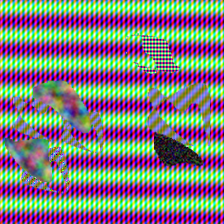

In [ ]:
imga = Image.open('dataset/imagea_2.png').convert('RGB')
imgb = Image.open('dataset/imageb_2.png').convert('RGB')
imgo = Image.open('dataset/out_2.png').convert('RGB')
imga

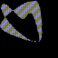

In [ ]:
imgb

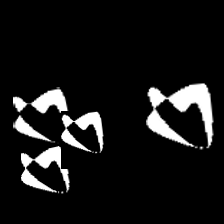

In [ ]:
imgo

In [ ]:
from google.colab import files

# Download the zip file
files.download("/content/dataset.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>